# Advanced Topics in Data Classification



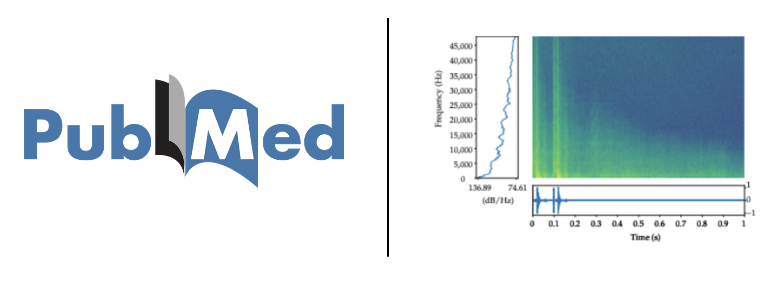

*PubMed data will be the focus of part I of this notebook and gunshot audio recordings will be the focus of parts II and III of this notebook.*

Sentence and Audio Classification

The objective of this notebook is to explore sentence and audio classification for research paper abstracts and firearm audio recordings respectively. Part I of this notebook will classify sentences in the context of their position in the abstracts of biomedical research papers. Part II will classify audio recordings of firearm discharges, recognizing different types of firearms. Finally, part III will summarize the findings of recent research papers related to gunshot detection.

---

*Matthew Acs*


# Part I: PubMed 20k RCT: Dataset for Sequential Sentence Classification

---


In Part I, I will utilize the PubMed 20k RCT dataset, a resource for sequential sentence classification. The goal is to develop a model that can classify sentences in the context of their position in abstracts of biomedical research papers. The dataset comprises abstracts from randomized controlled trials, with sentences sequentially labeled.


---

The code below imports the necessary python packages.

---


In [ ]:
# Import general libraries

import re
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
from collections import Counter

import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

##Loading the Data

The first step in creating the text classification model is to load the dataset. The code below loads training, validation, and testing data from a GitHub repository and separates it into data and labels. Furthermore, the unnecessary data attributes are removed, and the original/cleaned data is printed. Finally, I loaded an abstract from a bioinformatics paper that I published in IEEE access as a test datapoint for evaluating the model performance.

---

The code below loads the training data from a GitHub repository, removes the unnecessary attributes, and separates the data into the data and labels.

---


In [ ]:
url = "https://raw.githubusercontent.com/matthewaaa123/CAP6673/main/train_sen.csv"
train_df = pd.read_csv(url)
X_train = (train_df.drop(columns = ['abstract_id', 'line_id', 'line_number', 'total_lines', 'current_line', 'target'])).to_numpy()
Y_train = (train_df.loc[:,'target']).to_numpy()

X_train_english = deepcopy(X_train)
Y_train_english = deepcopy(Y_train)

---

The code below examines the first few rows of the dataset using pandas.

---


In [ ]:
train_df.head()

,abstract_id,line_id,abstract_text,line_number,total_lines,current_line,target
0,24491034,24491034_0_11,The emergence of HIV as a chronic condition me...,0,11,0_11,BACKGROUND
1,24491034,24491034_1_11,This paper describes the design and evaluation...,1,11,1_11,BACKGROUND
2,24491034,24491034_2_11,This study is designed as a randomised control...,2,11,2_11,METHODS
3,24491034,24491034_3_11,The intervention group will participate in the...,3,11,3_11,METHODS
4,24491034,24491034_4_11,The program is based on self-efficacy theory a...,4,11,4_11,METHODS


---

The code below examines the first example from the training dataset with its label.

---


In [ ]:
print(X_train[0])
print("")
print(Y_train[0])

['The emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .']

BACKGROUND


---

The code below loads the validation data from a GitHub repository, removes the unnecessary attributes, and separates the data into the data and labels.

---


In [ ]:
url = "https://raw.githubusercontent.com/matthewaaa123/CAP6673/main/val_sen.csv"
val_df = pd.read_csv(url)
X_val = (val_df.drop(columns = ['abstract_id', 'line_id', 'line_number', 'total_lines', 'current_line', 'target'])).to_numpy()
Y_val = (val_df.loc[:,'target']).to_numpy()

X_val_english = deepcopy(X_val)
Y_val_english = deepcopy(Y_val)

---

The code below examines the first few rows of the dataset using pandas.

---


In [ ]:
val_df.head()

,abstract_id,line_id,abstract_text,line_number,total_lines,current_line,target
0,15337700,15337700_0_9,Adrenergic activation is thought to be an impo...,0,9,0_9,BACKGROUND
1,15337700,15337700_1_9,Systemic venous norepinephrine was measured at...,1,9,1_9,RESULTS
2,15337700,15337700_2_9,Baseline norepinephrine level was associated w...,2,9,2_9,RESULTS
3,15337700,15337700_3_9,"On multivariate analysis , baseline norepineph...",3,9,3_9,RESULTS
4,15337700,15337700_4_9,"In contrast , the relation of the change in no...",4,9,4_9,RESULTS


---

The code below examines the first example from the validation dataset with its label.

---


In [ ]:
print(X_val[0])
print("")
print(Y_val[0])

['Adrenergic activation is thought to be an important determinant of outcome in subjects with chronic heart failure ( CHF ) , but baseline or serial changes in adrenergic activity have not been previously investigated in a large patient sample treated with a powerful antiadrenergic agent .']

BACKGROUND


---

The code below loads the testing data from a GitHub repository, removes the unnecessary attributes, and separates the data into the data and labels.

---


In [ ]:
url = "https://raw.githubusercontent.com/matthewaaa123/CAP6673/main/test_sen.csv"
test_df = pd.read_csv(url)
X_test = (test_df.drop(columns = ['abstract_id', 'line_id', 'line_number', 'total_lines', 'current_line', 'target'])).to_numpy()
Y_test = (test_df.loc[:,'target']).to_numpy()

X_test_english = deepcopy(X_test)
Y_test_english = deepcopy(Y_test)

---

The code below examines the first few rows of the dataset using pandas.

---


In [ ]:
test_df.head()

,abstract_id,line_id,abstract_text,line_number,total_lines,current_line,target
0,24562799,24562799_0_11,Many pathogenic processes and diseases are the...,0,11,0_11,BACKGROUND
1,24562799,24562799_1_11,It was recently demonstrated that supraphysiol...,1,11,1_11,BACKGROUND
2,24562799,24562799_2_11,"In the present study , we examined the associa...",2,11,2_11,BACKGROUND
3,24562799,24562799_3_11,"In addition , we compared plasma levels of MAp...",3,11,3_11,BACKGROUND
4,24562799,24562799_4_11,A total of 192 MI patients and 140 control per...,4,11,4_11,METHODS


---

The code below examines the first example from the testing dataset with its label.

---


In [ ]:
print(X_test[0])
print("")
print(Y_test[0])

['Many pathogenic processes and diseases are the result of an erroneous activation of the complement cascade and a number of inhibitors of complement have thus been examined for anti-inflammatory actions .']

BACKGROUND


---

The code below loads an abstract from one of my published papers into a numpy array.

---


In [ ]:
my_abstract = []
my_abstract.append(['miRNA expression profiles are heterogeneously expressed among cancer types, with miRNAs serving as highly tissue specific tumor suppressors and oncogenes.'])
my_abstract.append(['Machine learning methodologies have been used to develop high performance pan-cancer classification models and identify potentially novel miRNA biomarkers for clinical investigation.'])
my_abstract.append(['However, it is important to understand how such data science techniques correlate to established biological processes to advance integration into clinical environments.'])
my_abstract.append(['This research aims to assess how the top miRNA features selected by machine learning models relate to clinically and biologically verified miRNA biomarkers.'])
my_abstract.append(['We developed Support Vector Machine and Random Forest machine learning models for cancer classification, iteratively adding cancer classes to the multiclass models.'])
my_abstract.append(['The relationship between the selected top features (miRNAs) and clinically verified miRNA biomarkers was assessed through percent relevance, i.e., the number of verified miRNAs vs the number of selected features. '])
my_abstract.append(['We found that as the number of cancer classes increased, the performance metrics decreased, yet the percentage relevance of the miRNA feature selection signature slightly increased before stabilizing.'])
my_abstract.append(['Additionally, after conducting principal component analysis, the non-cancer tissues from all samples had very similar expression visualizations, while all cancerous tissues had unique profiles. '])
my_abstract.append(['The results indicated that models with a greater number of cancer classes shift towards focusing on cancer-diverse miRNAs of greater relevance with characterized functionality.'])
my_abstract.append(['This work suggests that miRNAs may be highly unique to specific cancerous tissues and can be strong biomarkers for detection and classification, but current verified biomarkers fall toward more cancer-wide miRNAs when detecting cancer.'])

my_abstract = np.array(my_abstract)

---

The code below prints the first sentence from my abstract.

---


In [ ]:
print(my_abstract[0])

['miRNA expression profiles are heterogeneously expressed among cancer types, with miRNAs serving as highly tissue specific tumor suppressors and oncogenes.']


##Data Preprocessing

The next step is to preprocess the data. Since we will later create an LSTM, we must tokenize the data, pad the sequences, and one hot encode the labels. First, the parameters for tokenization and padding are defined. I set the vocabulary size to 2,000 (out of the ~30,000 unique words found in the corpus) because words that only occur a few times are unlikely to be semantically useful in terms of classification. I also set the maximum length of a sentence to 64 words so that no sentence will be cut off. I fit the tokenizer on the training data and applied it to all the data. The resulting sequences were then padded with zeros to create a consistent sample length. Finally, the labels were one hot encoded.

---

The code defines parameters for text tokenization and padding and fits a tokenizer to the training data. This tokenizer will be used to convert the dataset from strings into a sequence of integers.

---


In [ ]:
# Tokenization and padding parameters
vocab_size = 2000
max_length = 64
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

# Tokenization
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train.flatten())
word_index = tokenizer.word_index

---

The code below prints the word index output by the tokenizer. The word index shows the tokenization scheme produced by the tokenization process.

---


In [ ]:
print(word_index)

{'<OOV>': 1, 'the': 2, 'of': 3, 'and': 4, 'in': 5, 'to': 6, 'with': 7, 'a': 8, 'were': 9, 'was': 10, '0': 11, 'patients': 12, 'for': 13, 'group': 14, '1': 15, 'p': 16, 'or': 17, '2': 18, 'at': 19, 'treatment': 20, 'on': 21, 'study': 22, '3': 23, 'after': 24, 'by': 25, '5': 26, '6': 27, 'groups': 28, 'is': 29, '4': 30, 'as': 31, 'this': 32, 'mg': 33, 'that': 34, 'not': 35, 'no': 36, 'from': 37, 'an': 38, 'randomized': 39, 'placebo': 40, 'between': 41, 'significantly': 42, 'significant': 43, 'compared': 44, 'than': 45, '8': 46, 'control': 47, 'n': 48, 'two': 49, 'trial': 50, '7': 51, 'be': 52, 'months': 53, 'during': 54, 'both': 55, 'clinical': 56, 'mean': 57, '12': 58, 'had': 59, '9': 60, 'vs': 61, 'all': 62, '10': 63, 'therapy': 64, 'there': 65, 'weeks': 66, 'time': 67, 'intervention': 68, 'baseline': 69, 'more': 70, 'effects': 71, 'dose': 72, 'day': 73, 'we': 74, 'years': 75, 'effect': 76, 'pain': 77, '95': 78, 'one': 79, 'who': 80, 'but': 81, 'are': 82, 'rate': 83, '05': 84, 'days': 

---

The code below tokenizes the training data and pads the resulting sequence. The training labels are also one hot encoded.  

---


In [ ]:
# Convert to sequences and pad
X_train = tokenizer.texts_to_sequences(X_train.flatten())
X_train = pad_sequences(X_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)

Y_train = pd.get_dummies(Y_train).values

---

The code below prints a training datapoint after tokenization along with its label.

---


In [ ]:
print(X_train[0])
print("")
print(Y_train[0])

[   2    1    3  516   31    8  296  632 1180   34  810 1203    7  516
   82  490    6    1   70    1   13    2  273  343    3  152  632  360
 1957  302 1613    4  858    1    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]

[1 0 0 0 0]


---

The code below tokenizes the validation data and pads the resulting sequence. The validation labels are also one hot encoded.  

---


In [ ]:
# Convert to sequences and pad
X_val = tokenizer.texts_to_sequences(X_val.flatten())
X_val = pad_sequences(X_val, maxlen=max_length, padding=padding_type, truncating=trunc_type)

Y_val = pd.get_dummies(Y_val).values

---

The code below prints a validation datapoint after tokenization along with its label.

---


In [ ]:
print(X_val[0])
print("")
print(Y_val[0])

[   1 1284   29    1    6   52   38  569    1    3  134    5   89    7
  296  271  361 1585   81   69   17    1  179    5    1  237  122   35
  183  813  633    5    8  642  121  552   99    7    8    1    1  972
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]

[1 0 0 0 0]


---

The code below tokenizes the testing data and pads the resulting sequence. The testing labels are also one hot encoded.  

---


In [ ]:
# Convert to sequences and pad
X_test = tokenizer.texts_to_sequences(X_test.flatten())
X_test = pad_sequences(X_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

Y_test = pd.get_dummies(Y_test).values

---

The code below prints a testing datapoint after tokenization along with its label.

---


In [ ]:
print(X_test[0])
print("")
print(Y_test[0])

[1108    1    1    4 1443   82    2  857    3   38    1 1284    3    2
    1    1    4    8  235    3 1301    3    1  122 1093  183  525   13
  685  788    1    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]

[1 0 0 0 0]


---

The code below tokenizes my abstract data and pads the resulting sequence.

---


In [ ]:
# Convert to sequences and pad
my_abstract_input = tokenizer.texts_to_sequences(my_abstract.flatten())
my_abstract_input = pad_sequences(my_abstract_input, maxlen=max_length, padding=padding_type, truncating=trunc_type)

---

The code below prints a sentence from my abstract after tokenization.

---


In [ ]:
print(my_abstract_input[0])

[   1  948 1430   82    1    1  168  173 1141    7    1    1   31 1055
  743  429  740    1    4    1    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


##Exploratory Data Analysis

Before a model can be created, the data must be explored through an EDA. This section explores the number of datapoints in the dataset, the distribution of the data across classes, what words are indicative of each class, and how sample abstracts from the training, validation, and testing datasets look after segmentation based on the given labels. The results and insights from this EDA will inform the creation the LSTM model as well as give more context to the dataset and the behavior of the model.

---

The code below prints the five unique classes found in the dataset .

---


In [ ]:
print(np.unique(((train_df.loc[:,'target']).to_numpy()).flatten()))

['BACKGROUND' 'CONCLUSIONS' 'METHODS' 'OBJECTIVE' 'RESULTS']


---

The code below prints the number of datapoints in the dataset.

---


In [ ]:
print("Number of datapoints")
print("--------------------")
print("")

print("Training: ", len(X_train))
print("Validation: ",len(X_val))
print("Testing: ",len(X_test))

Number of datapoints
--------------------

Training:  80000
Validation:  28932
Testing:  29493


###Training Data

---

The code below graphs the number of training samples for each sentence class.

---


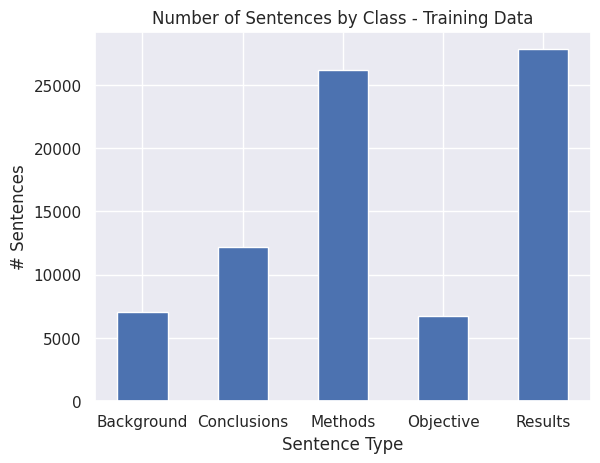

In [ ]:
number_classes = {'Background': len([x for x in Y_train if x[0] == 1]),
'Conclusions': len([x for x in Y_train if x[1] == 1]),
'Methods': len([x for x in Y_train if x[2] == 1]),
'Objective': len([x for x in Y_train if x[3] == 1]),
'Results': len([x for x in Y_train if x[4] == 1])}

## Plots the number of datapoints per class in the training data
sns.set(font_scale=1)
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Sentences by Class - Training Data");
plt.xlabel('Sentence Type');
plt.ylabel('# Sentences');

---

The code below prints the most common words for each class (from the training dataset) that are unique from the most common words for the entire training dataset. This gives insight into which words are indicative of each class.

---


In [ ]:
b = []
c = []
m = []
o = []
r = []

for i in range(len(Y_train)):
  if Y_train[i][0] == 1:
    b.append(X_train_english[i])
  if Y_train[i][1] == 1:
    c.append(X_train_english[i])
  if Y_train[i][2] == 1:
    m.append(X_train_english[i])
  if Y_train[i][3] == 1:
    o.append(X_train_english[i])
  if Y_train[i][4] == 1:
    r.append(X_train_english[i])

text = ''.join(X_train_english.flatten())
words = re.findall(r'\b\w+\b', text.lower())
word_counts = Counter(words)
common_words = word_counts.most_common(100)
common_words = [x[0] for x in common_words]

text = ''.join(np.array(b).flatten())
words = re.findall(r'\b\w+\b', text.lower())
word_counts = Counter(words)
common_words_b = word_counts.most_common(100)
common_words_b = [x[0] for x in common_words_b]

text = ''.join(np.array(c).flatten())
words = re.findall(r'\b\w+\b', text.lower())
word_counts = Counter(words)
common_words_c = word_counts.most_common(100)
common_words_c = [x[0] for x in common_words_c]

text = ''.join(np.array(m).flatten())
words = re.findall(r'\b\w+\b', text.lower())
word_counts = Counter(words)
common_words_m = word_counts.most_common(100)
common_words_m = [x[0] for x in common_words_m]

text = ''.join(np.array(o).flatten())
words = re.findall(r'\b\w+\b', text.lower())
word_counts = Counter(words)
common_words_o = word_counts.most_common(100)
common_words_o = [x[0] for x in common_words_o]

text = ''.join(np.array(r).flatten())
words = re.findall(r'\b\w+\b', text.lower())
word_counts = Counter(words)
common_words_r = word_counts.most_common(100)
common_words_r = [x[0] for x in common_words_r]

print("Common Words in Background")
print("--------------------------")
print([x for x in common_words_b if x not in common_words])
print("")

print("Common Words in Conclusions")
print("--------------------------")
print([x for x in common_words_c if x not in common_words])
print("")

print("Common Words in Methods")
print("--------------------------")
print([x for x in common_words_m if x not in common_words])
print("")

print("Common Words in Objective")
print("--------------------------")
print([x for x in common_words_o if x not in common_words])
print("")

print("Common Words in Results")
print("--------------------------")
print([x for x in common_words_r if x not in common_words])
print("")

Common Words in Background
--------------------------
['been', 'have', 'has', 'may', 'studies', 'disease', 'however', 'whether', 'associated', 'cancer', 'used', 'health', 'it', 'these', 'aim', 'care', 'high', 'can', 'trials', 'effective', 'based', 'evaluate', 'surgery', 'chronic', 'children', 'low', 'which', 'gov', 'clinicaltrials', 'shown', 'reduce', 'long', 'acute', 'term', 'outcomes', 'their', 'coronary', 'safety', 'determine', 'common', 'its', 'compare', 'function', 'evidence', 's', 'most', 'effectiveness', 'results']

Common Words in Conclusions
--------------------------
['may', 'effective', 'results', 'these', 'can', 'associated', 'it', 'did', 'high', 'have', 'well', 'term', 'has', 'should', 'suggest', 'when', 'low', 'further', 'our', 'however', 'improve', 'increased', 'care', 'safe', 'better', 'higher', 'findings', 'similar', 'function', 'improved', 'reduced', 'based', 'health', 'used', 'benefit', 'long', 'increase', 'without', 'studies', 'patient']

Common Words in Methods
---

---

The code below prints the number of lines for the first 100 training datapoints. This allows me to print a whole paragraph segmented based on the respective sentence labels.

---


In [ ]:
print( (((train_df.loc[:,'total_lines']).to_numpy()).flatten())[0:100] )

[11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17  8  8  8  8  8  8  8  8
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 11 11 11 11 11 11 11 11 11 11
 11 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11]


---

The code below segments the first three abstracts from the training data based on a color code. This visualizes the class of the sentence along with the sentence position within the abstract.

---


In [ ]:
print("Legend: ")
print("-------------")
print("\033[91m" + "Background" + "\033[0m")
print("\033[92m" + "Conclusions" + "\033[0m")
print("\033[93m" + "Methods" + "\033[0m")
print("\033[94m" + "Objective" + "\033[0m")
print("\033[95m" + "Results" + "\033[0m")
print("")

print("Abstract 1: ")
print("-------------")
for i in range(11):
  flag_2 = 0
  if Y_train[i][0] == 1:
    print("\033[91m" + str(X_train_english[i]) + "\033[0m")
  if Y_train[i][1] == 1:
    print("\033[92m" + str(X_train_english[i]) + "\033[0m")
  if Y_train[i][2] == 1:
    print("\033[93m" + str(X_train_english[i]) + "\033[0m")
  if Y_train[i][3] == 1:
    print("\033[94m" + str(X_train_english[i]) + "\033[0m")
  if Y_train[i][4] == 1:
    print("\033[95m" + str(X_train_english[i]) + "\033[0m")

print("")
print("Abstract 2: ")
print("-------------")
for i in range(11, 23):
  flag_2 = 0
  if Y_train[i][0] == 1:
    print("\033[91m" + str(X_train_english[i]) + "\033[0m")
  if Y_train[i][1] == 1:
    print("\033[92m" + str(X_train_english[i]) + "\033[0m")
  if Y_train[i][2] == 1:
    print("\033[93m" + str(X_train_english[i]) + "\033[0m")
  if Y_train[i][3] == 1:
    print("\033[94m" + str(X_train_english[i]) + "\033[0m")
  if Y_train[i][4] == 1:
    print("\033[95m" + str(X_train_english[i]) + "\033[0m")

print("")
print("Abstract 3: ")
print("-------------")
for i in range(23, 40):
  flag_2 = 0
  if Y_train[i][0] == 1:
    print("\033[91m" + str(X_train_english[i]) + "\033[0m")
  if Y_train[i][1] == 1:
    print("\033[92m" + str(X_train_english[i]) + "\033[0m")
  if Y_train[i][2] == 1:
    print("\033[93m" + str(X_train_english[i]) + "\033[0m")
  if Y_train[i][3] == 1:
    print("\033[94m" + str(X_train_english[i]) + "\033[0m")
  if Y_train[i][4] == 1:
    print("\033[95m" + str(X_train_english[i]) + "\033[0m")

Legend: 
-------------
Background
Conclusions
Methods
Objective
Results

Abstract 1: 
-------------
['The emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .']
['This paper describes the design and evaluation of Positive Outlook , an online program aiming to enhance the self-management skills of gay men living with HIV .']
['This study is designed as a randomised controlled trial in which men living with HIV in Australia will be assigned to either an intervention group or usual care control group .']
["The intervention group will participate in the online group program ` Positive Outlook ' ."]
['The program is based on self-efficacy theory and uses a self-management approach to enhance skills , confidence and abilities to manage the psychosocial issues associated with HIV in daily life .']
['Participants will access t

###Validation Data

---

The code below graphs the number of validation samples for each sentence class.

---


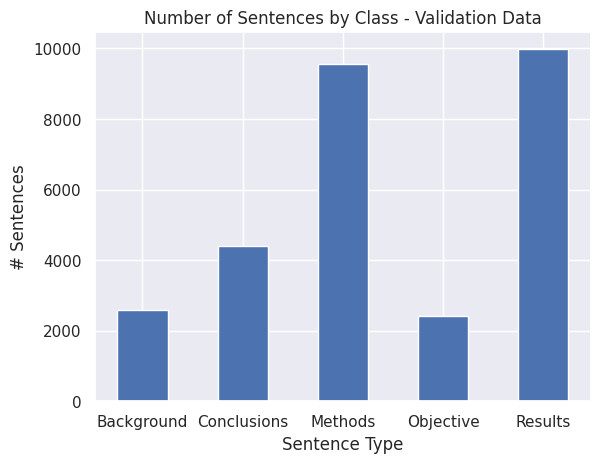

In [ ]:
number_classes = {'Background': len([x for x in Y_val if x[0] == 1]),
'Conclusions': len([x for x in Y_val if x[1] == 1]),
'Methods': len([x for x in Y_val if x[2] == 1]),
'Objective': len([x for x in Y_val if x[3] == 1]),
'Results': len([x for x in Y_val if x[4] == 1])}

## Plots the number of datapoints per class in the validation data
sns.set(font_scale=1)
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Sentences by Class - Validation Data");
plt.xlabel('Sentence Type');
plt.ylabel('# Sentences');

---

The code below prints the number of lines for the first 100 validation datapoints. This allows me to print a whole paragraph segmented based on the respective sentence labels.

---


In [ ]:
print( (((val_df.loc[:,'total_lines']).to_numpy()).flatten())[0:100] )

[ 9  9  9  9  9  9  9  9  9 12 12 12 12 12 12 12 12 12 12 12 12 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 12 12 12 12 12 12 12 12 12 12 12 12 11
 11 11 11 11 11 11 11 11 11 11  9  9  9  9  9  9  9  9  9  8  8  8  8  8
  8  8  8 12 12 12 12 12 12 12 12 12 12 12 12  5  5  5  5  5 12 12 12 12
 12 12 12 12]


---

The code below segments the first three abstracts from the validation data based on a color code. This visualizes the class of the sentence along with the sentence position within the abstract.

---


In [ ]:
print("Legend: ")
print("-------------")
print("\033[91m" + "Background" + "\033[0m")
print("\033[92m" + "Conclusions" + "\033[0m")
print("\033[93m" + "Methods" + "\033[0m")
print("\033[94m" + "Objective" + "\033[0m")
print("\033[95m" + "Results" + "\033[0m")
print("")

print("Abstract 1: ")
print("-------------")
for i in range(9):
  flag_2 = 0
  if Y_val[i][0] == 1:
    print("\033[91m" + str(X_val_english[i]) + "\033[0m")
  if Y_val[i][1] == 1:
    print("\033[92m" + str(X_val_english[i]) + "\033[0m")
  if Y_val[i][2] == 1:
    print("\033[93m" + str(X_val_english[i]) + "\033[0m")
  if Y_val[i][3] == 1:
    print("\033[94m" + str(X_val_english[i]) + "\033[0m")
  if Y_val[i][4] == 1:
    print("\033[95m" + str(X_val_english[i]) + "\033[0m")

print("")
print("Abstract 2: ")
print("-------------")
for i in range(9,21):
  flag_2 = 0
  if Y_val[i][0] == 1:
    print("\033[91m" + str(X_val_english[i]) + "\033[0m")
  if Y_val[i][1] == 1:
    print("\033[92m" + str(X_val_english[i]) + "\033[0m")
  if Y_val[i][2] == 1:
    print("\033[93m" + str(X_val_english[i]) + "\033[0m")
  if Y_val[i][3] == 1:
    print("\033[94m" + str(X_val_english[i]) + "\033[0m")
  if Y_val[i][4] == 1:
    print("\033[95m" + str(X_val_english[i]) + "\033[0m")

print("")
print("Abstract 3: ")
print("-------------")
for i in range(21, 35):
  flag_2 = 0
  if Y_val[i][0] == 1:
    print("\033[91m" + str(X_val_english[i]) + "\033[0m")
  if Y_val[i][1] == 1:
    print("\033[92m" + str(X_val_english[i]) + "\033[0m")
  if Y_val[i][2] == 1:
    print("\033[93m" + str(X_val_english[i]) + "\033[0m")
  if Y_val[i][3] == 1:
    print("\033[94m" + str(X_val_english[i]) + "\033[0m")
  if Y_val[i][4] == 1:
    print("\033[95m" + str(X_val_english[i]) + "\033[0m")

Legend: 
-------------
Background
Conclusions
Methods
Objective
Results

Abstract 1: 
-------------
['Adrenergic activation is thought to be an important determinant of outcome in subjects with chronic heart failure ( CHF ) , but baseline or serial changes in adrenergic activity have not been previously investigated in a large patient sample treated with a powerful antiadrenergic agent .']
['Systemic venous norepinephrine was measured at baseline , 3 months , and 12 months in the beta-Blocker Evaluation of Survival Trial ( BEST ) , which compared placebo treatment with the beta-blocker/sympatholytic agent bucindolol .']
['Baseline norepinephrine level was associated with a progressive increase in rates of death or death plus CHF hospitalization that was independent of treatment group .']
['On multivariate analysis , baseline norepinephrine was also a highly significant ( P < 0.001 ) independent predictor of death .']
['In contrast , the relation of the change in norepinephrine at 3 mon

###Test Data

---

The code below graphs the number of testing samples for each sentence class.

---


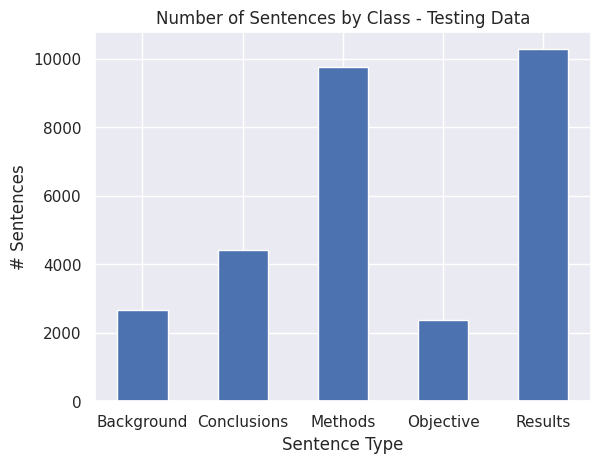

In [ ]:
number_classes = {'Background': len([x for x in Y_test if x[0] == 1]),
'Conclusions': len([x for x in Y_test if x[1] == 1]),
'Methods': len([x for x in Y_test if x[2] == 1]),
'Objective': len([x for x in Y_test if x[3] == 1]),
'Results': len([x for x in Y_test if x[4] == 1])}

## Plots the number of datapoints per class in the testing data
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Sentences by Class - Testing Data");
plt.xlabel('Sentence Type');
plt.ylabel('# Sentences');

---

The code below prints the number of lines for the first 100 testing datapoints. This allows me to print a whole paragraph segmented based on the respective sentence labels.

---


In [ ]:
print( (((test_df.loc[:,'total_lines']).to_numpy()).flatten())[0:100] )

[11 11 11 11 11 11 11 11 11 11 11  7  7  7  7  7  7  7 13 13 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 10 10 10 10
 10 10 10 10 10 10 14 14 14 14 14 14 14 14 14 14 14 14 14 14  8  8  8  8
  8  8  8  8 12 12 12 12 12 12 12 12 12 12 12 12  9  9  9  9  9  9  9  9
  9 14 14 14]


---

The code below segments the first three abstracts from the testing data based on a color code. This visualizes the class of the sentence along with the sentence position within the abstract.

---


In [ ]:
print("Legend: ")
print("-------------")
print("\033[91m" + "Background" + "\033[0m")
print("\033[92m" + "Conclusions" + "\033[0m")
print("\033[93m" + "Methods" + "\033[0m")
print("\033[94m" + "Objective" + "\033[0m")
print("\033[95m" + "Results" + "\033[0m")
print("")

print("Abstract 1: ")
print("-------------")
for i in range(11):
  flag_2 = 0
  if Y_test[i][0] == 1:
    print("\033[91m" + str(X_test_english[i]) + "\033[0m")
  if Y_test[i][1] == 1:
    print("\033[92m" + str(X_test_english[i]) + "\033[0m")
  if Y_test[i][2] == 1:
    print("\033[93m" + str(X_test_english[i]) + "\033[0m")
  if Y_test[i][3] == 1:
    print("\033[94m" + str(X_test_english[i]) + "\033[0m")
  if Y_test[i][4] == 1:
    print("\033[95m" + str(X_test_english[i]) + "\033[0m")

print("")
print("Abstract 2: ")
print("-------------")
for i in range(11, 18):
  flag_2 = 0
  if Y_test[i][0] == 1:
    print("\033[91m" + str(X_test_english[i]) + "\033[0m")
  if Y_test[i][1] == 1:
    print("\033[92m" + str(X_test_english[i]) + "\033[0m")
  if Y_test[i][2] == 1:
    print("\033[93m" + str(X_test_english[i]) + "\033[0m")
  if Y_test[i][3] == 1:
    print("\033[94m" + str(X_test_english[i]) + "\033[0m")
  if Y_test[i][4] == 1:
    print("\033[95m" + str(X_test_english[i]) + "\033[0m")

print("")
print("Abstract 3: ")
print("-------------")
for i in range(18, 31):
  flag_2 = 0
  if Y_test[i][0] == 1:
    print("\033[91m" + str(X_test_english[i]) + "\033[0m")
  if Y_test[i][1] == 1:
    print("\033[92m" + str(X_test_english[i]) + "\033[0m")
  if Y_test[i][2] == 1:
    print("\033[93m" + str(X_test_english[i]) + "\033[0m")
  if Y_test[i][3] == 1:
    print("\033[94m" + str(X_test_english[i]) + "\033[0m")
  if Y_test[i][4] == 1:
    print("\033[95m" + str(X_test_english[i]) + "\033[0m")

Legend: 
-------------
Background
Conclusions
Methods
Objective
Results

Abstract 1: 
-------------
['Many pathogenic processes and diseases are the result of an erroneous activation of the complement cascade and a number of inhibitors of complement have thus been examined for anti-inflammatory actions .']
['It was recently demonstrated that supraphysiological concentrations of the endogenous complement inhibitor MAp44 ( also denoted MAP1 ) protect against myocardial reperfusion injury .']
['In the present study , we examined the association between outcome after acute myocardial infarction ( MI ) and the plasma levels of MAp44 and its related proteins MASP-1 and MASP-3 in patients with first-time MI .']
['In addition , we compared plasma levels of MAp44 , MASP-1 , and MASP-3 in MI patients to levels in a healthy control group .']
['A total of 192 MI patients and 140 control persons were included .']
['Plasma samples were obtained and analysed with time-resolved immunofluorometric assa

### EDA Results

The EDA highlighted three important features of the dataset.

1 -	This is an imbalanced classification task. There are many sentences representing methods and results, but relatively fewer representing background, conclusions, and objectives. This class distribution is consistent throughout the training, validation, and testing data. The reason for this is that a typical abstract contains more sentences discussing the methods and results than the background, conclusions, or objectives, which are typically at most one sentences. This trend can be observed in the sample color-coded abstracts. However, when creating and evaluating the LSTM, this imbalance is important to note.

2 -	The class-specific common words highlight that each class commonly contains words that are intuitively indicative of that class. For instance, the most common word found in the methods section is “randomly”. This makes sense as a sentence that is describing a procedure would typically use the word randomly to describe an experimental setup. Overall, this indicates that simply the contents of a sentence (without order) may be highly indicative of the class of that sentence. For context, when I read through an abstract, I typically look for key words such as “overall” to find the class of that sentence, which is like what this EDA showed may be possible for the LSTM to model.

3 -	Finally, there seems to be a degree of ambiguity between what classifies as each sentence type. In the training data EDA, I would have classified both first sentences of abstracts 2 and 3 as objective sentences, however, the true label labels abstract 2’s first sentence as background. Reading through the other samples I found other sentences for each class where I disagree with the label. This suggests that as a classifier myself, I likely would not perform near 100% accuracy. This may indicate that a lower accuracy may still be “good-enough” as ambiguous sentences may be classified into a class that may still work.


##LSTM

This section defines the LSTM model’s architecture, finds the optimal number of epochs, and trains the model on the full dataset. I created an LSTM with two bidirectional LSTM layers and dropout layers. The dropout layers help mitigate overfitting, an issue that I encountered quickly without them. Additionally, the two layers were inspired by another LSTM implementation that was successful on Kaggle for this dataset. Finally, I trained the model on both the training and validation dataset to maximize the number of datapoints after I determined the optimal number of epochs by using the training set to train the model and validation set to evaluate the model performance. The loss curve indicated overfitting once the validation loss started to increase and diverge from the training curve. The next section will evaluate the final model’s performance.

---

The code below defines a plot_loss_curve function, which plots the loss curve of a model training process given the history.

---


In [ ]:
def plot_loss_curve(history):
    # Extract training and validation loss from the history
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get the number of epochs
    epochs = range(1, len(train_loss) + 1)

    # Plotting the loss curves
    plt.plot(epochs, train_loss, color='r', label='Training loss')
    plt.plot(epochs, val_loss, color='b', label='Validation loss')

    # Adding labels and title
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Display the plot
    plt.show()

---

The code below defines the bidirectional LSTM model’s architecture. The model includes an embedding layer, two bidirectional LSTM layers, a dense layer, and dropout layers. The code compiles the model and prints the model summary.

---


In [ ]:
# Building the LSTM Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 128)           256000    
                                                                 
 bidirectional (Bidirection  (None, 64, 128)           98816     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 64, 128)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8

---

The code below fits the LSTM model to the training data for 20 epochs.

---


In [ ]:
# Training the LSTM Model
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))

Epoch 1/20
2500/2500 [==============================] - 78s 26ms/step - loss: 0.6210 - accuracy: 0.7656 - val_loss: 0.5250 - val_accuracy: 0.8085
Epoch 2/20
2500/2500 [==============================] - 47s 19ms/step - loss: 0.5038 - accuracy: 0.8153 - val_loss: 0.5182 - val_accuracy: 0.8108
Epoch 3/20
2500/2500 [==============================] - 48s 19ms/step - loss: 0.4641 - accuracy: 0.8304 - val_loss: 0.5015 - val_accuracy: 0.8126
Epoch 4/20
2500/2500 [==============================] - 46s 18ms/step - loss: 0.4339 - accuracy: 0.8414 - val_loss: 0.5017 - val_accuracy: 0.8166
Epoch 5/20
2500/2500 [==============================] - 46s 18ms/step - loss: 0.4067 - accuracy: 0.8517 - val_loss: 0.5024 - val_accuracy: 0.8143
Epoch 6/20
2500/2500 [==============================] - 51s 20ms/step - loss: 0.3832 - accuracy: 0.8599 - val_loss: 0.5210 - val_accuracy: 0.8108
Epoch 7/20
2500/2500 [==============================] - 46s 18ms/step - loss: 0.3572 - accuracy: 0.8693 - val_loss: 0.5255 -

---

The code below plots the loss curve. The curve shows that the model beings to overfit after around 3 epochs.

---


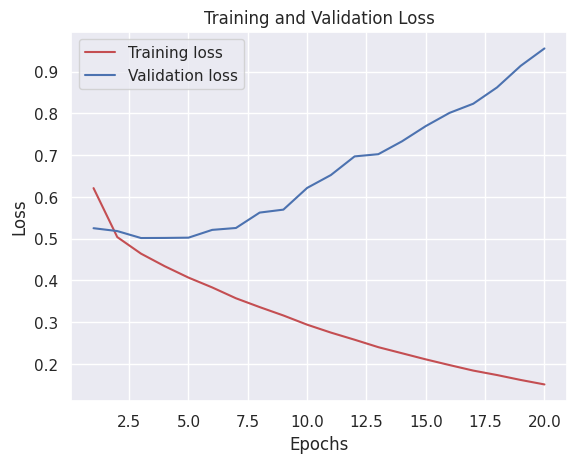

In [ ]:
plot_loss_curve(history)

---

The code below combines the training and validation datasets to make a full training dataset to train the final model on. The model is redefined, compiled, and trained for the optimal number of epochs identified previously.

---


In [ ]:
X_full= np.concatenate((X_train, X_val), axis=0)
Y_full= np.concatenate((Y_train, Y_val), axis=0)

model_full = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model_full.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_full.fit(X_full, Y_full, epochs=3)

Epoch 1/3
3405/3405 [==============================] - 80s 21ms/step - loss: 0.5958 - accuracy: 0.7778
Epoch 2/3
3405/3405 [==============================] - 59s 17ms/step - loss: 0.4944 - accuracy: 0.8189
Epoch 3/3
3405/3405 [==============================] - 58s 17ms/step - loss: 0.4576 - accuracy: 0.8321


##Model Evaluation and Results

This section evaluates the LSTM model trained previously. The model is evaluated and the loss, accuracy, precision, recall, f1-score, and confusion matrix are displayed. An example abstract segmented based on the model’s prediction is also displayed next to the ground truth. Finally, my abstract is segmented using the model.

---

The code below evaluates the model on the test set and prints the accuracy and loss values.  

---


In [ ]:
loss, metrics = model_full.evaluate(X_test, Y_test)
print("Accuracy", metrics)
print("Loss", loss)

922/922 [==============================] - 9s 8ms/step - loss: 0.4945 - accuracy: 0.8211
Accuracy 0.8210762143135071
Loss 0.4945259392261505


---

The code below evaluates the model on the test set and prints the precision, recall, and f1-score.  

---


In [ ]:
y_pred = model_full.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

report = classification_report(y_true_classes, y_pred_classes)
print()
print(report)

922/922 [==============================] - 7s 7ms/step

              precision    recall  f1-score   support

           0       0.63      0.54      0.58      2663
           1       0.73      0.75      0.74      4426
           2       0.86      0.92      0.89      9751
           3       0.74      0.62      0.68      2377
           4       0.88      0.88      0.88     10276

    accuracy                           0.82     29493
   macro avg       0.77      0.74      0.75     29493
weighted avg       0.82      0.82      0.82     29493



---

The code below prints the confusion matrix for the test dataset.  

---


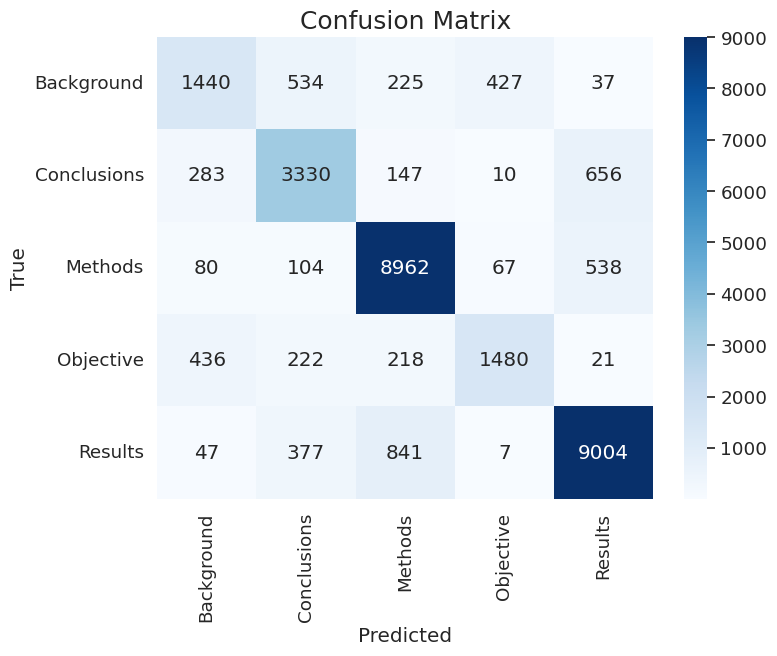

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
classes = ['Background', 'Conclusions', 'Methods', 'Objective', 'Results']

# Plotting the confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

The code below prints an abstract segmented based on the predictions generated by the model alongside the true segmentation provided by the labels. Below that is the model-segmented version of my abstract.

---


In [ ]:
print("Legend: ")
print("-------------")
print("\033[91m" + "Background" + "\033[0m")
print("\033[92m" + "Conclusions" + "\033[0m")
print("\033[93m" + "Methods" + "\033[0m")
print("\033[94m" + "Objective" + "\033[0m")
print("\033[95m" + "Results" + "\033[0m")
print("")

print("Predicted Abstract Segmentation: ")
print("-------------")
for i in range(11):
  flag_2 = 0
  if y_pred_classes[i] == 0:
    print("\033[91m" + str(X_test_english[i]) + "\033[0m")
  if y_pred_classes[i] == 1:
    print("\033[92m" + str(X_test_english[i]) + "\033[0m")
  if y_pred_classes[i] == 2:
    print("\033[93m" + str(X_test_english[i]) + "\033[0m")
  if y_pred_classes[i] == 3:
    print("\033[94m" + str(X_test_english[i]) + "\033[0m")
  if y_pred_classes[i] == 4:
    print("\033[95m" + str(X_test_english[i]) + "\033[0m")

print("")
print("Actual Abstract Segmentation: ")
print("-------------")
for i in range(11):
  flag_2 = 0
  if Y_test[i][0] == 1:
    print("\033[91m" + str(X_test_english[i]) + "\033[0m")
  if Y_test[i][1] == 1:
    print("\033[92m" + str(X_test_english[i]) + "\033[0m")
  if Y_test[i][2] == 1:
    print("\033[93m" + str(X_test_english[i]) + "\033[0m")
  if Y_test[i][3] == 1:
    print("\033[94m" + str(X_test_english[i]) + "\033[0m")
  if Y_test[i][4] == 1:
    print("\033[95m" + str(X_test_english[i]) + "\033[0m")

print("")
print("My Abstract Segmentation: ")
print("-------------")
y_my_abstract = model_full.predict(my_abstract_input, verbose=0)
y_my_abstract = np.argmax(y_my_abstract, axis=1)
for i in range(10):
  flag_2 = 0
  if y_my_abstract[i] == 0:
    print("\033[91m" + str(my_abstract[i]) + "\033[0m")
  if y_my_abstract[i] == 1:
    print("\033[92m" + str(my_abstract[i]) + "\033[0m")
  if y_my_abstract[i] == 2:
    print("\033[93m" + str(my_abstract[i]) + "\033[0m")
  if y_my_abstract[i] == 3:
    print("\033[94m" + str(my_abstract[i]) + "\033[0m")
  if y_my_abstract[i] == 4:
    print("\033[95m" + str(my_abstract[i]) + "\033[0m")

Legend: 
-------------
Background
Conclusions
Methods
Objective
Results

Predicted Abstract Segmentation: 
-------------
['Many pathogenic processes and diseases are the result of an erroneous activation of the complement cascade and a number of inhibitors of complement have thus been examined for anti-inflammatory actions .']
['It was recently demonstrated that supraphysiological concentrations of the endogenous complement inhibitor MAp44 ( also denoted MAP1 ) protect against myocardial reperfusion injury .']
['In the present study , we examined the association between outcome after acute myocardial infarction ( MI ) and the plasma levels of MAp44 and its related proteins MASP-1 and MASP-3 in patients with first-time MI .']
['In addition , we compared plasma levels of MAp44 , MASP-1 , and MASP-3 in MI patients to levels in a healthy control group .']
['A total of 192 MI patients and 140 control persons were included .']
['Plasma samples were obtained and analysed with time-resolved im

###Model Results

The results show that the model achieved an accuracy of 82.4%, a precision/recall/f1-score of 0.82, and a loss of 0.4896. The confusion matrix showed that the objective and background classes were commonly confused with one another. Additionally, all classes were fairly often misclassified as one of the two classes with the most datapoints in the dataset (methods and results). Finally, the abstract segmentation visualization showed that the actual and predicted test abstract were quite close. The mistake made by the model is reasonable and is one I could have also made. The segmented version of my abstract was also reasonably classified.

##Discussions and Conclusions


####Model Success

Overall, the LSTM model was successful in classifying the types of sentences in biomedical abstracts. An accuracy of 82% represents a relatively successful model. Participants on Kaggle achieved similar levels of accuracy using an LSTM and were only able to successfully improve the accuracy to around 87% by using ensemble models. Comparing the model’s predictions against the ground truth also reveals that the mistakes made by the model are reasonable. For instance, the model classified a background sentence as an objective sentence; however, I also have trouble distinguishing between the two in the context of this dataset. Furthermore, in my abstract a result sentence was classified as conclusion. However, this sentence is slightly ambiguous and could be interpreted as either class of sentence.

The EDA also hinted at the possibility of using a bag-of-words model to classify the sentences. The most common unique words in each class already identified key words that I associate with each class. Thus, foregoing the sequential data, a bag-of-words model may perform well and be more interpretable/simple. However, I believe that an LSTM would still perform better as some sentences such as background/conclusions sentences need context to identify (not just word contents).

####Sentence Type Ambiguity

The classification of each sentence of a biomedical abstract into either background, conclusions, results, methods, or objective is ambiguous and lends itself to inconsistencies within the dataset. In the EDA, I found two sentences from two different abstracts that used a structure similar to “The aim of this study is to….”, which is clearly an objective sentence. However, one was labeled as background as the other was labeled as objective. This is inconsistent and confusing, which impacted the model. I would group objective and background into one class to reduce this ambiguity. Beyond the inconsistencies that I identified in the dataset, these two classes are often ambiguous with a significant overlap. Thus, grouping them may benefit the model and the application of such a model.

####Real World Use-Case

As part of the testing of the LSTM, I segmented an abstract from my publication using the model’s predictions. The abstract was relatively accurately segmented and helped me quickly identify the main parts of the abstract, i.e. background, methods, and results/conclusions. This model could be deployed to a browser extension (in combination with a model to identify and extract abstracts from paper) to quickly segment abstracts in online journals. This will allow researcher to quickly find the important parts of the abstract, such as the methods and results, to screen papers. This will save time in determining which papers are worth looking further into.


# Part II: Multi-firearm Audio Classification using Deep Learning

---

In part II, I will utilize a gunshot dataset to create a deep learning model that can classify audio recording of firearm discharges, recognizing the different types of firearms. The dataset contains a collection of audio recordings featuring various firearms being discharged in different orientations. The audio recordings will be preprocessed to extract features for classification.

---

Installs the visualkeras python library so that the neural networks can be visualized.

---

In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 10.2 MB/s eta 0:00:00


---

The code below imports the necessary python packages.

---

In [ ]:
import os
import zipfile
import numpy as np
import librosa
from copy import deepcopy

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import visualkeras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import MaxPooling3D, Flatten
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.layers import BatchNormalization, Reshape
from tensorflow.keras.utils import to_categorical

##Loading the Data

The first step to creating the model is to load the data. A zip file containing all the data is uploaded to the Google Colab VM manually, after which it can be unzipped and processed. The files are extracted and then converted into spectrograms, labels, audio waves, and Mel-frequency cepstral coefficients using the librosa python package. The labels are derived from the directory structure after the dataset is unzipped.

---

The code below defines the function read_data that creates an array of spectrograms, labels, audio waves, and Mel-frequency cepstral coefficients from the original directory given the file path. A custom hop length and n_fft value is defined for both the stft and mfcc operations using the librosa package.

---

In [ ]:
# Function to read sounds and convert to different formats
def read_data(folder_path):
    labels = []
    spectrograms = []
    waves = []
    mels = []

    for label in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, label)
        if os.path.isdir(subfolder_path):
            for file in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, file)
                if file_path.endswith('.wav'):
                    y, sr = librosa.load(file_path)
                    S = librosa.stft(y, hop_length = 512, n_fft = 2048)
                    M = librosa.feature.mfcc(y=y, sr=sr, hop_length = 2048, n_fft = 512)
                    S_mag = np.abs(S)
                    S_dB = librosa.amplitude_to_db(S_mag, ref=np.max)
                    waves.append(y)
                    mels.append(M)
                    spectrograms.append(S_dB)
                    labels.append(label)

    return spectrograms, labels, waves, sr, mels

---

The code below unzips the dataset and creates a destination folder.

---

In [ ]:
# zip file path
zip_file_path = '/content/edge-collected-gunshot-audio.zip'

# Destination folder path
extracted_folder_path = '/content/data/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)


---

The code below reads the spectrograms, labels, audio data, and MFCCs using the read_data function.

---

In [ ]:
# Path to dataset
folder_path = '/content/data/edge-collected-gunshot-audio/'

# Read spectrograms, MFCCs, audio data, and labels
spectrograms, labels, waves, sr, mels = read_data(folder_path)

##Data Preprocessing

The next step is to preprocess the data. This involves padding the spectrogram and MFCC data to create inputs that are the same length. After padding is accomplished, the spectrograms must be expanded to include a channel dimension for the CNN model. Finally, the labels are on-hot encoded.

---

The code below defines the pad2d, which pads or trims a 2D array to a specified shape. This allows for uniform length input sizes for the models later.  

---

In [ ]:
# Function to pad or trim a 2D array to a desired shape
def pad2d(a, desired_size_1, desired_size_2):
    rows, cols = a.shape
    padded_a = np.zeros((desired_size_1, desired_size_2))
    rows_to_copy = min(rows, desired_size_1)
    cols_to_copy = min(cols, desired_size_2)
    padded_a[:rows_to_copy, :cols_to_copy] = a[:rows_to_copy, :cols_to_copy]
    return padded_a

---

The code below trims/pads the spectrograms and MFCCs to a specified shape, adds a channel dimension to the spectrograms, and one-hot encodes the labels.

---

In [ ]:
# Preprocess data
spectrograms = np.array([pad2d(s, 128, 128) for s in spectrograms])
mels = np.array([pad2d(m, 20, 65) for m in mels])

# Add channel dimension
spectrograms = np.expand_dims(spectrograms, axis=-1)

# One-hot encoding
label_dict = {label: i for i, label in enumerate(set(labels))}
y = np.array([label_dict[label] for label in labels])
y = to_categorical(y)

---

The code below creates an array that maps the one-hot encoding to the class for use in the confusion matrix later.

---

In [ ]:
encoded = ["", "", "", ""]
encoded[label_dict.get('remington_870_12_gauge')] = 'Remington'
encoded[label_dict.get('ruger_ar_556_dot223_caliber')] = 'Ruger'
encoded[label_dict.get('glock_17_9mm_caliber')] = 'Glock'
encoded[label_dict.get('38s&ws_dot38_caliber')] = 'Smith and Wesson'

##Exploratory Data Analysis

The final step before creating the models is to conduct an exploratory data analysis. This involves looking at the shape of the data, displaying the distribution of the data among the classes, plotting the different representations of the data, exploring how different classes look, and creating a PCA to visualize the space that each class occupies. The results from the EDA will help inform the process of defining and training the LSTM and CNN models.

---

The code below prints the shape of the spectrogram and MFCC data.

---

In [ ]:
print("Shape of Data Representations")
print("-----------------------------")
print("Spectrogram: ", spectrograms.shape)
print("MFCCs: ", mels.shape)

Shape of Data Representations
-----------------------------
Spectrogram:  (2148, 128, 128, 1)
MFCCs:  (2148, 20, 65)


---

The code below prints the unique data labels in the dataset.

---

In [ ]:
print("Dataset Labels")
print("-----------------------------")
print(np.unique(labels))

Dataset Labels
-----------------------------
['38s&ws_dot38_caliber' 'glock_17_9mm_caliber' 'remington_870_12_gauge'
 'ruger_ar_556_dot223_caliber']


---

 The code below graphs the distribution of data among the different classes.

 ---

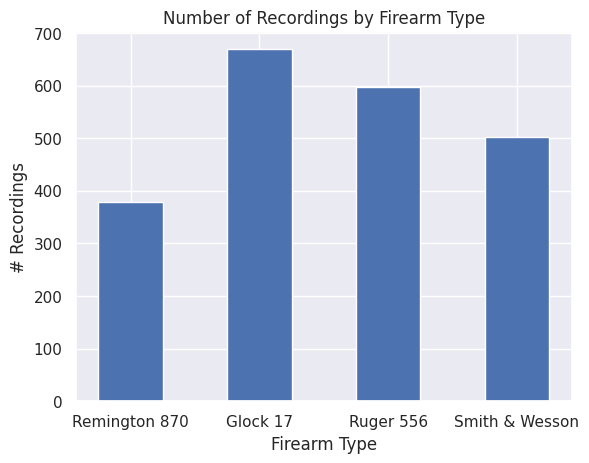

In [ ]:
number_classes = {'Remington 870': len([x for x in labels if x == 'remington_870_12_gauge']),
'Glock 17': len([x for x in labels if x == 'glock_17_9mm_caliber']),
'Ruger 556': len([x for x in labels if x == 'ruger_ar_556_dot223_caliber']),
'Smith & Wesson': len([x for x in labels if x == '38s&ws_dot38_caliber'])}

## Plots the number of datapoints per class in the data
sns.set(font_scale=1)
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Recordings by Firearm Type");
plt.xlabel('Firearm Type');
plt.ylabel('# Recordings');

---

The code below prints the first datapoints label.

---

In [ ]:
print(labels[0])

remington_870_12_gauge


---

The code below graphs the first datapoints sound wave.

---

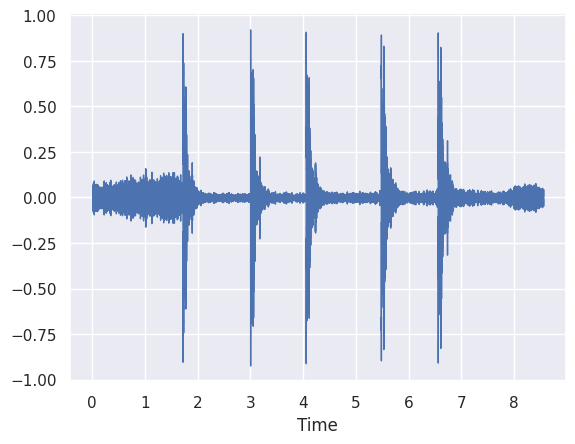

In [ ]:
librosa.display.waveshow(waves[0], sr=sr, axis='time',offset=0.0)

---

The code below graphs the first datapoints MFCC.

---

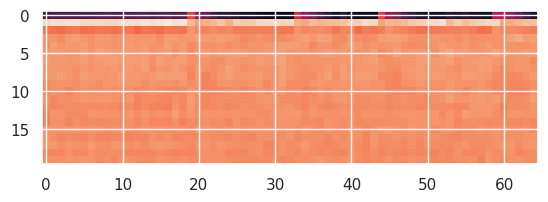

In [ ]:
plt.imshow(mels[0])

---

The code below displays the first datapoints spectrogram.

---

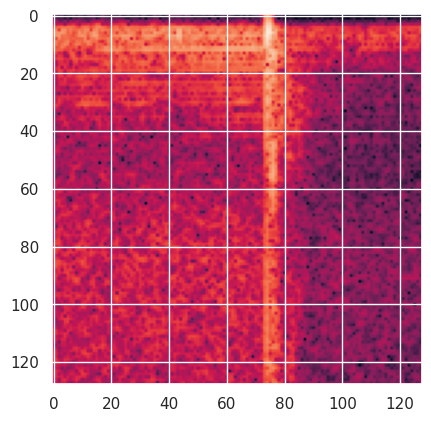

In [ ]:
plt.imshow(spectrograms[0])

---

The code below prints three spectrograms from each firearm type.

---

TRAINING DATA
----------



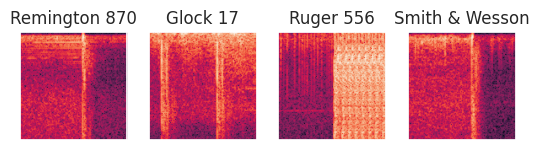

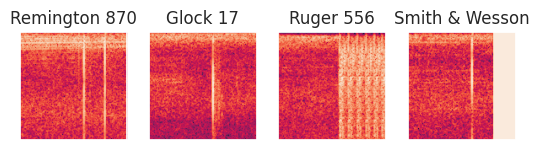

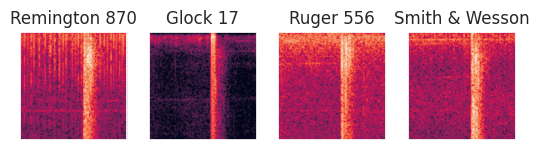

In [ ]:
print("TRAINING DATA")
print("----------")
print()

for j in range(3):
  flag_0 = 0
  flag_1 = 0
  flag_2 = 0
  flag_3 = 0

  for i in range(len(spectrograms)):

      ## Display a training data image from remington class
      if (labels[i] == 'remington_870_12_gauge' and labels[i+1] == 'remington_870_12_gauge' and labels[i+2] == 'remington_870_12_gauge') and flag_0 == 0:
          plt.subplot(1, 4, 1)
          plt.imshow(spectrograms[i+j])
          plt.title(f"Remington 870")
          plt.xticks([])
          plt.yticks([])
          flag_0 = 1

      ## Display a training data image from glock class
      if (labels[i] == 'glock_17_9mm_caliber' and labels[i+1] == 'glock_17_9mm_caliber' and labels[i+2] == 'glock_17_9mm_caliber') and flag_1 == 0:
          plt.subplot(1, 4, 2)
          plt.imshow(spectrograms[i+j])
          plt.title(f"Glock 17")
          plt.xticks([])
          plt.yticks([])
          flag_1 = 1

      ## Display a training data image from ruger class
      if (labels[i] == 'ruger_ar_556_dot223_caliber' and labels[i+1] == 'ruger_ar_556_dot223_caliber' and labels[i+2] == 'ruger_ar_556_dot223_caliber') and flag_2 == 0:
          plt.subplot(1, 4, 3)
          plt.imshow(spectrograms[i+j])
          plt.title(f"Ruger 556")
          plt.xticks([])
          plt.yticks([])
          flag_2 = 1

      ## Display a training data image from smith and wesson class
      if (labels[i] == '38s&ws_dot38_caliber' and labels[i+1] == '38s&ws_dot38_caliber' and labels[i+2] == '38s&ws_dot38_caliber') and flag_3 == 0:
          plt.subplot(1, 4, 4)
          plt.imshow(spectrograms[i+j])
          plt.title(f"Smith & Wesson")
          plt.xticks([])
          plt.yticks([])
          flag_3 = 1

      if flag_0 and flag_1 and flag_2 and flag_3:
          break
  plt.show()

---

The code below runs a PCA on the data and displays the projected data in 3D.

---

In [ ]:
## Flattens the data
X_PCA = []
for X in spectrograms:
  X_PCA.append(X.flatten())

## Fits a 3D PCA to the data
pca_3D = PCA(n_components=3)
X_pca_3D = pca_3D.fit_transform(X_PCA)

## Displays the data projected to the 3D PCA
fig = px.scatter_3d(
      X_pca_3D, x=0, y=1, z=2, color=labels,
      labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
  )
fig.show()

### EDA Results

There are four main findings that were highlighted in the EDA.

1 -	The dataset is roughly balanced. The bar graph shows that the classes all have around the same number of datapoints. There is not one class that contains far less data than the others nor one that contains far more. However, it is also worth noting that the Remington class has the fewest number of datapoints ~380, and the Glock class has the most ~670.

2 -	The data representations look very different. The waveform, MFCC, and spectrogram vary widely in appearance and seem to highlight different aspects of the data. Based on literature, I will use the MFCC for the LSTM and the spectrogram for the CNN. Looking at the different representations, this seems to make sense as the spectrogram contains more visually interpretable patterns when compared to the MFCC.

3 -	The data is not entirely clean. Displaying different samples from each class shows that some datapoints contain multiple shots, some contain more background noise, and some are far shorter and thus contain more padding. This lack of uniformity may have an impact on the accuracy that the models can achieve.

4 -	The PCA suggests that the spectrogram data is likely separable. The PCA graph shows several clusters of datapoints that all represent the classes. This may suggest that in a larger dimensionality, the dataset creates natural clusters that separate the classes, making the data separable by machine learning models.


##CNN


The first model that I explored was a CNN using the spectrograms as inputs. This section defines a deep CNN with four convolutional layers and three dense layers, creating a convolutional and dense block respectively. The data is split into 80-10-10 for training, validation, and testing. The model is then complied, and the summary is displayed. The model is trained for 100 epochs, after which the loss curve, test accuracy/precision/recall/f1-score, and confusion matrix are obtained.

---

The code below defines a plot_loss_curve function that plots the loss curve given a Keras training history.  

---

In [ ]:
def plot_loss_curve(history):
    # Extract training and validation loss from the history
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get the number of epochs
    epochs = range(1, len(train_loss) + 1)

    # Plotting the loss curves
    plt.plot(epochs, train_loss, color='r', label='Training loss')
    plt.plot(epochs, val_loss, color='b', label='Validation loss')

    # Adding labels and title
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Display the plot
    plt.show()

---

The code below defines the CNN model. The model contains four convolutional layers and three dense layers. I designed this CNN to be a deep model so that it has enough complexity to capture all the patterns present in the data.   

---

In [ ]:
def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional Block
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Flatten layer
    model.add(Flatten())

    # Dense Block
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    return model


---

The code below splits the data into training, testing, and validation (80-10-10) and compiles the model.

---

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(spectrograms, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Define input shape and number of classes
input_shape = X_train[0].shape
num_classes = y.shape[1]

# Create and compile the model
model = create_cnn_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

---

The code below prints the model summary.

---

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 63, 63, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                        

---

The code below visualizes the model’s architecture.

---

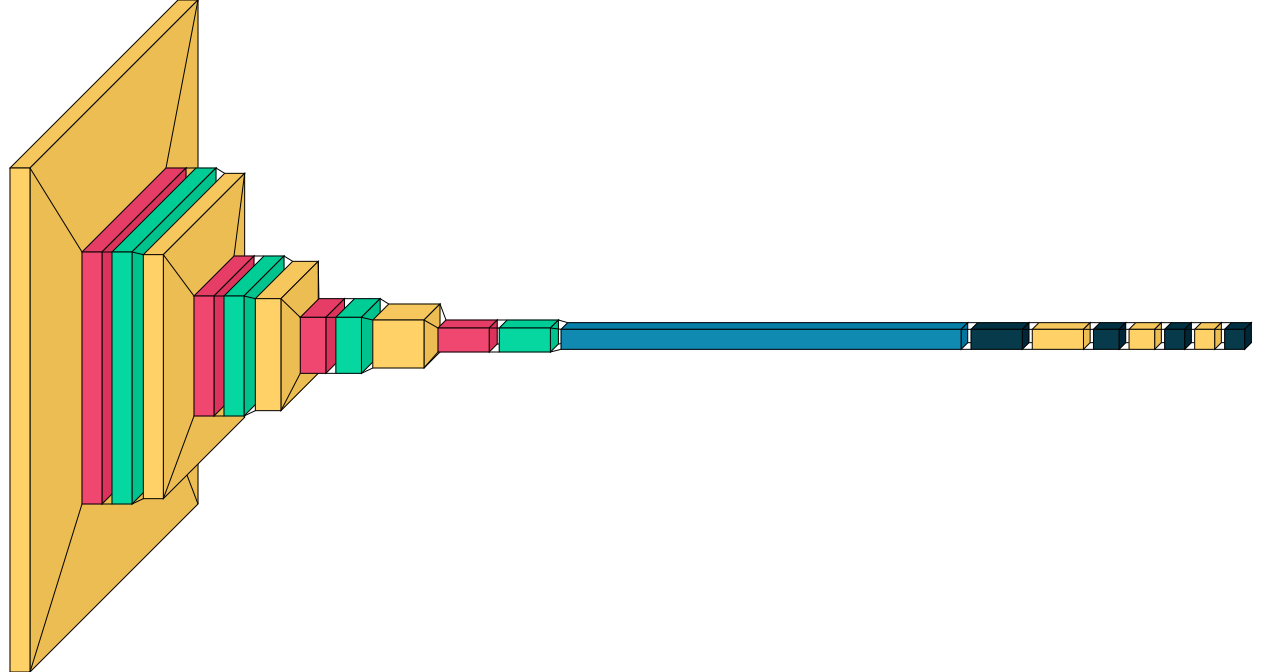

In [ ]:
visualkeras.layered_view(model)

---

The code below trains the model for 100 epochs.

---

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
54/54 [==============================] - 16s 30ms/step - loss: 5.8927 - accuracy: 0.2841 - val_loss: 16.9312 - val_accuracy: 0.2465
Epoch 2/100
54/54 [==============================] - 1s 17ms/step - loss: 2.9690 - accuracy: 0.3015 - val_loss: 8.1192 - val_accuracy: 0.3535
Epoch 3/100
54/54 [==============================] - 1s 17ms/step - loss: 2.0179 - accuracy: 0.2974 - val_loss: 1.3293 - val_accuracy: 0.3721
Epoch 4/100
54/54 [==============================] - 1s 17ms/step - loss: 1.6731 - accuracy: 0.3120 - val_loss: 1.3152 - val_accuracy: 0.3209
Epoch 5/100
54/54 [==============================] - 1s 18ms/step - loss: 1.4657 - accuracy: 0.3533 - val_loss: 1.3070 - val_accuracy: 0.3488
Epoch 6/100
54/54 [==============================] - 1s 18ms/step - loss: 1.3726 - accuracy: 0.3743 - val_loss: 1.3081 - val_accuracy: 0.3628
Epoch 7/100
54/54 [==============================] - 1s 17ms/step - loss: 1.3465 - accuracy: 0.3725 - val_loss: 1.2553 - val_accuracy: 0.4419
Epoc

---

The code below plots the model’s loss curve.

---

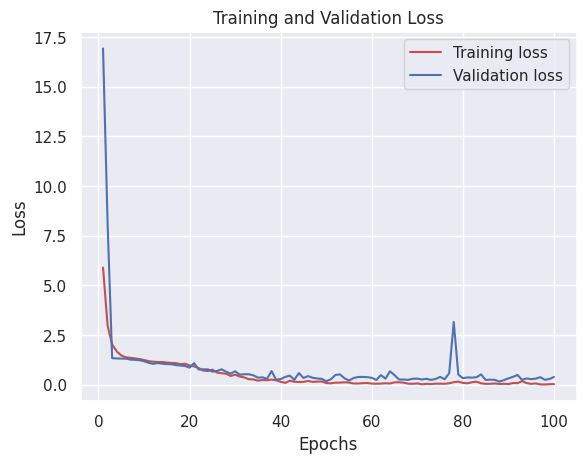

In [ ]:
plot_loss_curve(history)

---

The code below finds the test accuracy and loss.

---

In [ ]:
loss, metrics = model.evaluate(X_test, y_test)
print("Accuracy", metrics)
print("Loss", loss)

7/7 [==============================] - 0s 17ms/step - loss: 0.7893 - accuracy: 0.9116
Accuracy 0.9116278886795044
Loss 0.789301872253418


---

The code below finds the test precision, recall, and f1-score.

---

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

report = classification_report(y_true_classes, y_pred_classes)
print()
print(report)

7/7 [==============================] - 0s 6ms/step

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.92      0.84      0.88        55
           2       0.90      0.96      0.93        79
           3       0.94      0.92      0.93        53

    accuracy                           0.91       215
   macro avg       0.91      0.90      0.90       215
weighted avg       0.91      0.91      0.91       215



---

The code below prints the confusion matrix for the testing data.  

---

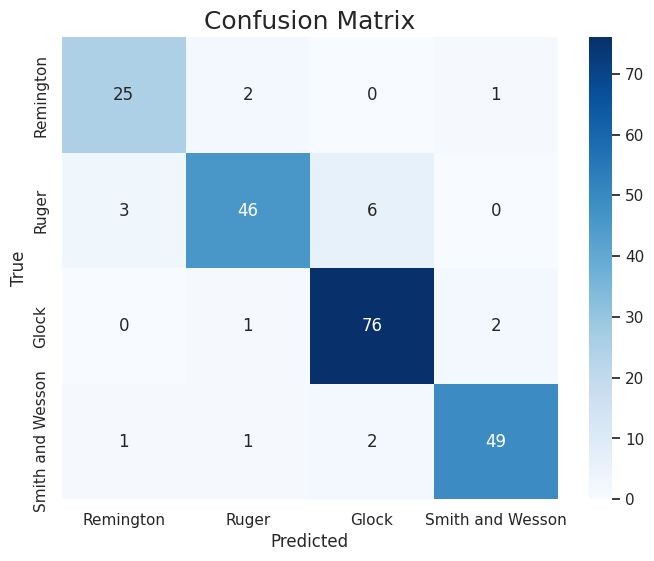

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
classes = [encoded[0], encoded[1], encoded[2], encoded[3]]

# Plotting the confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##LSTM

The second model that I explored was an LSTM using the MFCCs as inputs. This section defines a LSTM with two LSTM layers and three dense layers, creating an LSTM and dense block respectively. The data is split into 80-10-10 for training, validation, and testing. The model is then complied, and the summary is displayed. The model is trained for 50 epochs, after which the loss curve, test accuracy/precision/recall/f1-score, and confusion matrix are obtained.

---

The code below defines an LSTM model with an LSTM block and a dense block. The LSTM block contains two LSTM layers, and the dense block contains three dense layers. Dropout layers are included between each trainable layers to mitigate overfitting.

---

In [ ]:
def create_lstm_model(input_shape, num_classes):
    model = Sequential()

    ## LSTM Block
    model.add(LSTM(128,input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128))
    model.add(Dropout(0.2))

    ## Dense Block
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(48, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

---

The code below splits the data into training, testing, and validation (80-10-10) and compiles the model.

---

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(mels, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Define input shape and number of classes
input_shape = X_train[0].shape
num_classes = y.shape[1]

# Create and compile the model
model = create_lstm_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

---


The code below prints the model summary.


---

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 128)           99328     
                                                                 
 dropout_3 (Dropout)         (None, 20, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)               

---

The code below trains the model for 50 epochs.

---

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
54/54 [==============================] - 11s 52ms/step - loss: 1.3791 - accuracy: 0.3073 - val_loss: 1.3423 - val_accuracy: 0.4279
Epoch 2/50
54/54 [==============================] - 1s 14ms/step - loss: 1.3021 - accuracy: 0.3830 - val_loss: 1.2105 - val_accuracy: 0.4698
Epoch 3/50
54/54 [==============================] - 1s 13ms/step - loss: 1.1729 - accuracy: 0.4732 - val_loss: 1.0751 - val_accuracy: 0.4791
Epoch 4/50
54/54 [==============================] - 1s 20ms/step - loss: 0.9938 - accuracy: 0.5448 - val_loss: 0.9754 - val_accuracy: 0.5814
Epoch 5/50
54/54 [==============================] - 1s 14ms/step - loss: 0.8118 - accuracy: 0.6554 - val_loss: 0.8794 - val_accuracy: 0.6698
Epoch 6/50
54/54 [==============================] - 1s 13ms/step - loss: 0.6349 - accuracy: 0.7602 - val_loss: 0.8435 - val_accuracy: 0.7209
Epoch 7/50
54/54 [==============================] - 1s 13ms/step - loss: 0.4962 - accuracy: 0.8248 - val_loss: 1.0612 - val_accuracy: 0.7070
Epoch 8/50
5

---

The code below plots the model’s loss curve.

---

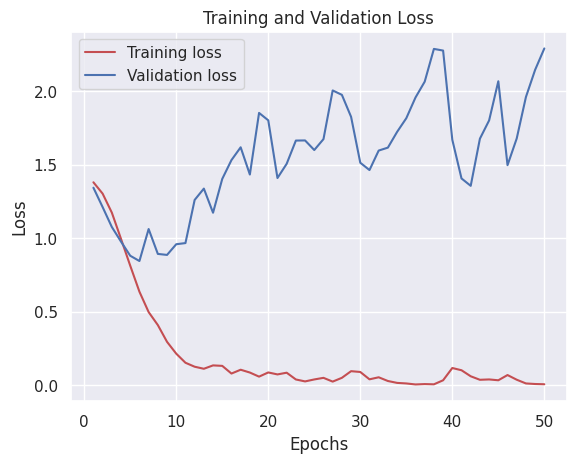

In [ ]:
plot_loss_curve(history)

---

The code below finds the test accuracy and loss.

---

In [ ]:
loss, metrics = model.evaluate(X_test, y_test)
print("Accuracy", metrics)
print("Loss", loss)

7/7 [==============================] - 0s 5ms/step - loss: 2.5128 - accuracy: 0.7535
Accuracy 0.7534883618354797
Loss 2.5128333568573


---

The code below finds the test precision, recall, and f1-score.

---

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

report = classification_report(y_true_classes, y_pred_classes)
print()
print(report)

7/7 [==============================] - 1s 4ms/step

              precision    recall  f1-score   support

           0       0.66      0.68      0.67        28
           1       0.71      0.80      0.75        55
           2       0.81      0.72      0.77        79
           3       0.78      0.79      0.79        53

    accuracy                           0.75       215
   macro avg       0.74      0.75      0.74       215
weighted avg       0.76      0.75      0.75       215



---

The code below prints the confusion matrix for the testing data.

---

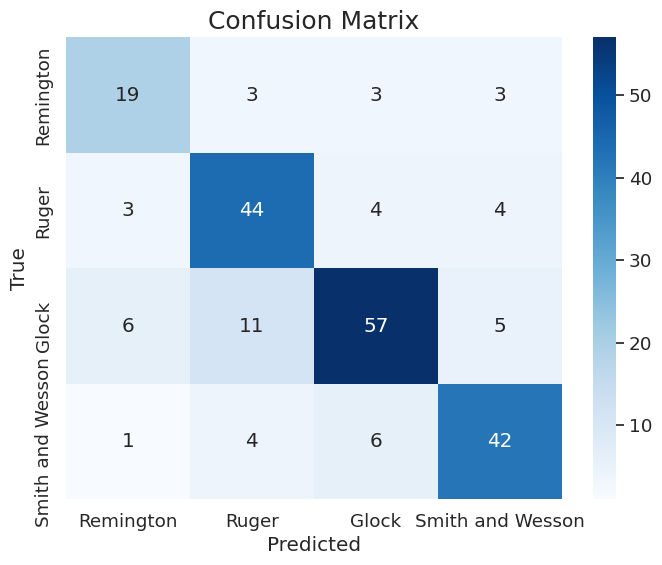

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
classes = [encoded[0], encoded[1], encoded[2], encoded[3]]

# Plotting the confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##Model Evaluation and Results

This section will discuss the results obtained from the experiments above and evaluate the suitability of the models for the task of firearm type classification from audio recordings.

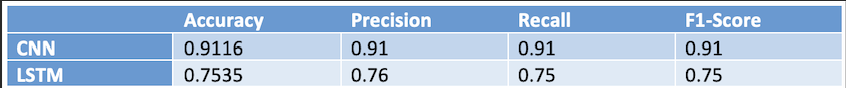

*Testing Metrics Based on the Experiments Above*

####Model Performance

Clearly, the CNN performed far better than the LSTM. The CNN had an accuracy/precision/recall/f1-score of about 91% while the LSTM had an accuracy/precision/recall/f1-score of about 75%. This is a large difference is accuracy that places the CNN on top. However, both models achieved a training accuracy of 99%, showing that both models were able to overfit. This means that the LSTM model struggled to generalize compared to the CNN. This is the reason for the large discrepancy in the testing metrics. The confusion matrices mirror this idea with the LSTM making more mistakes across all classes compared to the CNN. Additionally, the confusion matrices do not seem to indicate a trend in which classes were more likely to be incorrectly classified by either model. All classes seem to have a roughly equal chance at being misclassified.


####Training Process

The loss curves indicate that the CNN took longer to converge and was less prone to overfitting when compared to the LSTM. The LSTM’s validation loss began to quickly diverge while the CNN’s validation loss closely followed the training loss the entire training process. This suggests a difference in the models with regard to training. The LSTM may learn the general patterns of the dataset much faster but may be more susceptible to overfitting. In contrast, the CNN was less volatile and took longer to converge to the training dataset optima. However, the process generalized better as the validation loss never truly diverged as it did in the LSTM. Regardless, the fact that both models were able to overfit implies that the data representation contained enough information to do so, and the models were complex enough.


####Model Behavior

The LSTM model utilizes sequential data from the MFCC to model the data while the CNN utilizes spatial patterns found in the spectrogram representations. The de-facto standard for audio classification in literature is currently CNN models, which reflects the results indicated by the model performance. The CNN model performed very well on the spectrograms. To further analyze the different behaviors of the LSTM and CNN, a grad-cam approach could be implemented to analyze the portion of the spectrograms that the model focuses on when classifying each image.


##Discussions and Conclusions

This section will draw conclusions from the results of this notebook and discuss the challenges and novelties of the approach taken in this notebook.

####Model Success

Overall, the CNN model was successful in classifying the different types of firearm gunshot recordings. A 91% accuracy is relatively successful. The confusion matrix also showed that the model did not make mistakes often on the test set. Inspecting the misclassified samples may reveal why they were misclassified. For instance, they may have had more noise or unique characteristics that made them difficult to classify.

####Challenges

The three main challenges that I experienced in the development of this notebook were the dataset size, execution time, and hyperparameter tuning. The dataset took 30 minutes to upload manually to Google Colab. While this is not that significant, this needed to be done every time the runtime disconnected. This meant that I needed to develop continuously, or I would need to reupload the dataset the next time I wanted to work on the notebook. Secondly, without a GPU the notebook would take several hours to run. The models are large and take a long time to train. For this reason, I purchased compute units from Google Colab in order to have access to their GPUs. With a V100 GPU, the notebook runs in a matter of minutes. Finally, it was challenging to find the right hyperparameters for the LSTM. I initially tried to use the original data and the spectrograms for the LSTM, however, neither worked. After some research, I attempted to use the MFCC coefficients, which yielded better results. It took many different attempts at changing the hop length and the n_fft in order to get to the current results.

####Future Experiments

This notebook contains many different configurable parameters that could have a large impact on the final model’s performance. For instance, the data representation, the parameters of the data representation algorithms, and the model architecture are all parameters that could be changed. In future experiments, these parameters could be tested using a grid-search strategy to robustly identify an optimum. Additionally, using grad-cam on the CNN may yield interesting insights as to which parts of the spectrogram the model is using to classify the audio signals.


# Part III : Summarizing Research Papers on Gunshot Audio Classification

---

Following part II, this section concisely summarizes the main research question, methodology, and key findings of five academic papers related to gunshot audio detection. The summaries will provide insight into the different problems addressed, techniques used, and results gathered by researchers working in the field of gunshot audio detection and classification.



## Alignment based matching networks for one-shot classification and open-set recognition

Paresh Malalur and Tommi Jaakkola, 2019

---

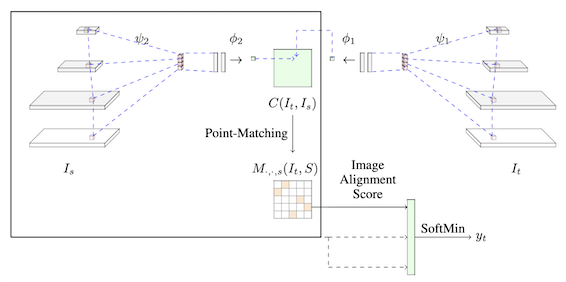

Summary: The paper by Malalur and Jaakkola tackles the one-shot learning task for the MiniImageNet and Omniglot datasets using an attention based matching network. The model architecture allows for an increased degree of insight into the network’s behavior and achieved state of the art results with 98.5% one shot accuracy across five classes in the Omniglot dataset and 48.92% in MiniImageNet.

## Towards an Indoor Gunshot Detection and Notification System Using Deep Learning

Tareq Khan, 2023

---

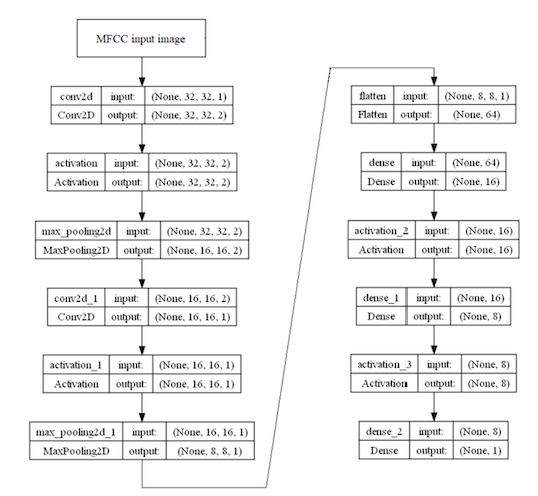

Summary: The paper by Khan explores the development of a machine learning algorithm along with a device, server, and app to detect gunshots in an indoor setting and alert appropriate emergency response personnel. Khan’s approach achieved a 98% test accuracy by converting audio files of gunshots to Mel Frequency Cepstral Coefficients (MFCC) based images and developing a basic CNN with two convolutional layers and three dense layers.

## Machine learning inspired efficient acoustic gunshot detection and localization system

Kabir et al., 2022

---

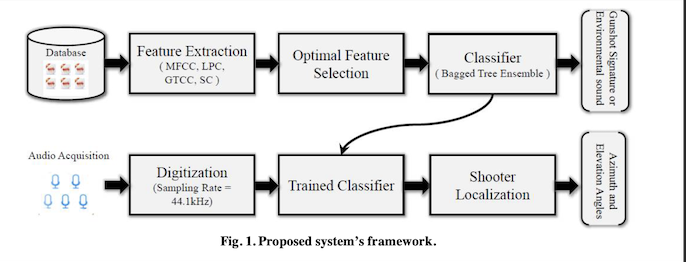

Summary: The paper by Kabir et al. seeks to explore the problem of gunshot detection and localization using bagged tree ensemble and support vector machine classifiers. A detection accuracy of 97.3% (LPC, MFCC, GTCC and Bagged Tree Ensemble) was achieved after testing the models with features derived from MFCC, LPC, GTCC, and SC methods.

## Gun identification from gunshot audios for secure public places using transformer learning

Nijhawan et al., 2022

---

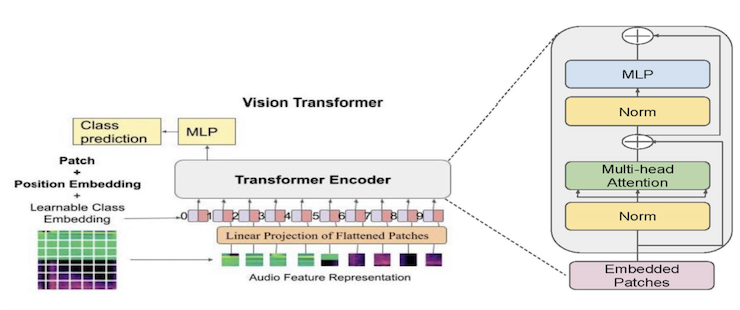

Summary: The paper by Nijhawan et al. investigates the problem of gun type identification (rifle, handgun, none) from gunshot audio only using transformer and CNN architectures. A classification accuracy of 93.87% was achieved using MFCC features with Mel-spectrograms and a vision transformer model.

## Measurements, Analysis, Classification, and Detection of Gunshot and Gunshot-like Sounds

Rajesh Baliram Singh and Hanqi Zhuang, 2022

---

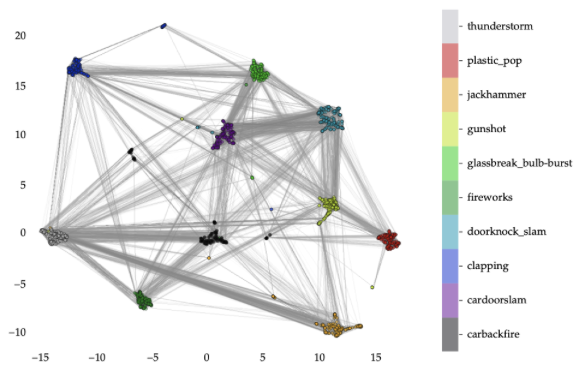

Summary: The paper by Singh and Zhuang approached the problem of gunshot and gunshot like sound detection by thoroughly analyzing the feature importance of audio signals. A random forest classifier achieved a  97% accuracy on the MFCC features, and the SHapley Additive exPlanations feature importance output, recent uniform manifold approximation, and projection method were used to analyze the feature importance and closeness of the audio datapoints.

#References
---

This section contains the references that I used to create this notebook.

- https://pubmed.ncbi.nlm.nih.gov/
- https://keras.io/
- https://librosa.org/doc/latest/index.html
- https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779
- https://www.izotope.com/en/learn/understanding-spectrograms.html
- https://ieeexplore.ieee.org/abstract/document/10135092
- https://www.kaggle.com/code/matthewjansen/nlp-medical-abstract-segmentation
- https://www.mdpi.com/2571-5577/6/5/94


